# Problem Statement 

### Using the `fraudTrain.csv` dataset, create models to predict if a transaction is fraudulent or not. 
### After building your model, use it to make predictions on the `fraudTest.csv` dataset. 
### Your goal is not only to make accurate predictions but also to understand how your model makes these decisions. 
### To do this, use Model Interpretability techniques to show which information helps the model decide if a transaction is fraudulent. Your task is to explain your model's decisions in a way that anyone can understand, even without a background in data science.

## Import Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import folium

from datetime import datetime

from geopy.distance import geodesic

import warnings
warnings.filterwarnings("ignore")

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import average_precision_score, classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.utils import shuffle

## Load the fraudTrain.csv

In [2]:
train_file_path = "D:\\Sourav_Singh\\Excell ,SQL & Tableau\\Project_to_make\\Fraud_Train.csv"
Train_Data = pd.read_csv(train_file_path)

In [3]:
# Display the rows of the dataset to understand its structure
Train_Data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


# 1. Data Preprocessing 

In [4]:
# Information about dataset 
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# "is_fraud" is our target column 
Train_Data['is_fraud'].value_counts(normalize=True) * 100

is_fraud
0    99.421135
1     0.578865
Name: proportion, dtype: float64

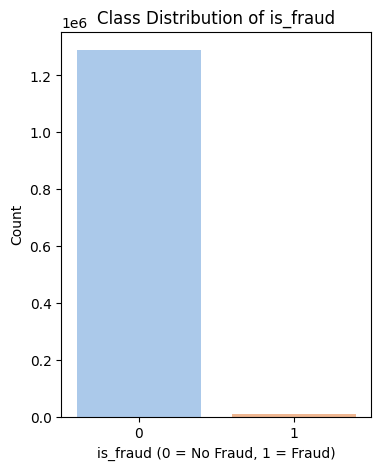

In [6]:
# 4. Analyze Class Distribution for Target Variable (is_fraud)
plt.figure(figsize=(4, 5))
sns.countplot(x="is_fraud", data=Train_Data, palette="pastel")
plt.title("Class Distribution of is_fraud")
plt.xlabel("is_fraud (0 = No Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [7]:
# Checking is there any duplicate raws or not
Train_Data.duplicated().any()

False

### In our analysis,
#### some columns are not helpful because it contains lots of unique value.

In [8]:
# drop columns which are not required 

In [9]:
Train_Data['cc_num'].nunique()

983

In [10]:
Train_Data.drop ( columns = ['cc_num','Unnamed: 0','trans_num', 'street', 'zip', 'city', 'unix_time'], axis =1, inplace = True )

In [11]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   merchant               1296675 non-null  object 
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   first                  1296675 non-null  object 
 5   last                   1296675 non-null  object 
 6   gender                 1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   lat                    1296675 non-null  float64
 9   long                   1296675 non-null  float64
 10  city_pop               1296675 non-null  int64  
 11  job                    1296675 non-null  object 
 12  dob                    1296675 non-null  object 
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

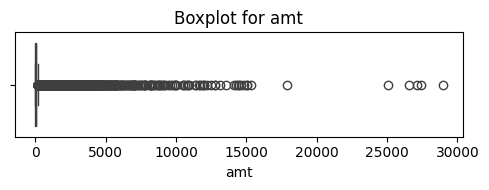

Column : amt
Q1 : 9.65, Q3 : 83.14, IQR : 73.49
Number of outliers in amt : 67290




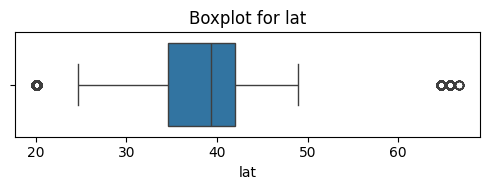

Column : lat
Q1 : 34.6205, Q3 : 41.9404, IQR : 7.319899999999997
Number of outliers in lat : 4679




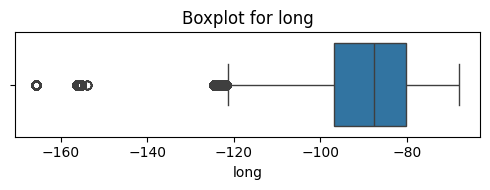

Column : long
Q1 : -96.798, Q3 : -80.158, IQR : 16.64
Number of outliers in long : 49922




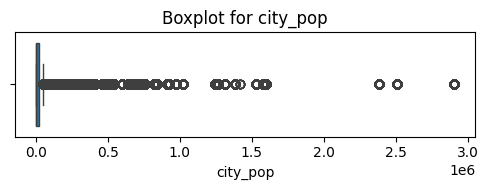

Column : city_pop
Q1 : 743.0, Q3 : 20328.0, IQR : 19585.0
Number of outliers in city_pop : 242674




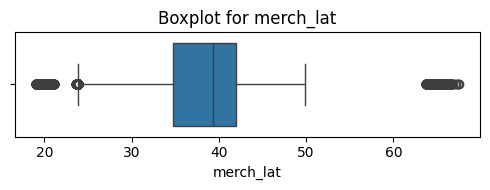

Column : merch_lat
Q1 : 34.733572, Q3 : 41.957164, IQR : 7.2235919999999965
Number of outliers in merch_lat : 4967




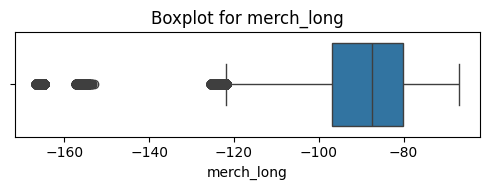

Column : merch_long
Q1 : -96.8972755, Q3 : -80.2367965, IQR : 16.66047900000001
Number of outliers in merch_long : 41994




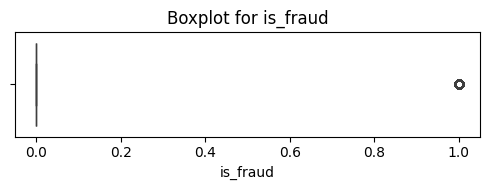

Column : is_fraud
Q1 : 0.0, Q3 : 0.0, IQR : 0.0
Number of outliers in is_fraud : 7506


In [12]:
# List of numerical columns to calculate IQR 
numerical_columns = Train_Data.select_dtypes(include=['int64', 'float64']).columns

# To calculate IQR and identify outliers 
def detect_outliers_iqr(data, clmn):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[clmn].quantile(0.25)
    Q3 = data[clmn].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[clmn] < lower_bound) | (data[clmn] > upper_bound)]
    
    return Q1, Q3, IQR, outliers

# calculate IQR, detect outliers
for col in numerical_columns:
    Q1, Q3, IQR, outliers = detect_outliers_iqr(Train_Data, col)

    print( "\n" )
    # Boxplot to visualize the outliers
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=Train_Data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()    
    
    print(f"Column : {col}")
    print(f"Q1 : {Q1}, Q3 : {Q3}, IQR : {IQR}")
    print(f"Number of outliers in {col} : {len(outliers)}")

In [13]:
# calculate IQR and filter out rows with outliers
def remove_outliers_iqr(data, clmn):
    # Q1 and Q3 
    Q1 = data[clmn].quantile(0.25)
    Q3 = data[clmn].quantile(0.75)
    
    # Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Setting up bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keeping only the rows within the bounds (without outliers)
    Data_no_outliers = data[(data[clmn] >= lower_bound) & (data[clmn] <= upper_bound)]
    
    return Data_no_outliers

# copy of the dataset so we can modify it safely
Data_no_outliers = Train_Data.copy()

# Remove outliers
for col in numerical_columns:
    Data_no_outliers = remove_outliers_iqr(Data_no_outliers, col)

# Checking how many rows were removed to understand the impact
print("Original dataset shape :", Train_Data.shape)
print("New dataset shape after removing outliers :", Data_no_outliers.shape)

Original dataset shape : (1296675, 16)
New dataset shape after removing outliers : (947837, 16)


In [14]:
# Check class distribution
print("Class distribution before and after outlier removal :")
print("Original :", Train_Data['is_fraud'].value_counts(),"\n")
print("After removal :", Data_no_outliers['is_fraud'].value_counts())

Class distribution before and after outlier removal :
Original : is_fraud
0    1289169
1       7506
Name: count, dtype: int64 

After removal : is_fraud
0    947837
Name: count, dtype: int64


In [15]:
# "amt", "city_pop" these two columns contains large no. of outliers
column1 = 'amt'  
column2 = 'city_pop' 

# Using Log transformation ( Adding 1 to avoid log(0) )
Train_Data[f'log_{column1}'] = np.log(Train_Data[column1] + 1)  
Train_Data[f'log_{column2}'] = np.log(Train_Data[column2] + 1)  

# Display few rows to see the new log columns
print(Train_Data[[column1, f'log_{column1}', column2, f'log_{column2}']].head())

      amt   log_amt  city_pop  log_city_pop
0    4.97  1.786747      3495      8.159375
1  107.23  4.684259       149      5.010635
2  220.11  5.398660      4154      8.332068
3   45.00  3.828641      1939      7.570443
4   41.96  3.760269        99      4.605170


In [16]:
# Extract Date and Time Components,
# year, month, day, hour, dow for analysis.

# Ensure the column is in datetime format
Train_Data['trans_date_trans_time'] = pd.to_datetime(Train_Data['trans_date_trans_time'])

# Extract date-related features
Train_Data['Year'] = Train_Data['trans_date_trans_time'].dt.year
Train_Data['Month'] = Train_Data['trans_date_trans_time'].dt.month
Train_Data['Day'] = Train_Data['trans_date_trans_time'].dt.day
Train_Data['Hour'] = Train_Data['trans_date_trans_time'].dt.hour
Train_Data['Day_of_Week'] = Train_Data['trans_date_trans_time'].dt.day_name()  

In [17]:
# Join the name from first and last
Train_Data['Name'] = Train_Data['first'].astype(str) + ' ' + Train_Data['last'].astype(str)

In [18]:
Train_Data['dob'] = pd.to_datetime(Train_Data['dob'])
Train_Data['Age'] = (datetime.now() - Train_Data['dob']).dt.days // 365

Train_Data['Age'] = Train_Data['Age'].astype('object')

In [19]:
Train_Data['Age_Group'] = pd.cut (
    Train_Data['Age'], 
    bins=[0, 18, 30, 50, 70, 100], 
    labels=['<18', '18-30', '30-50', '50-70', '>70'] )

In [20]:
Train_Data['Age'].nunique()

80

In [21]:
Train_Data['Name'].nunique()

973

In [22]:
# Removing Unwanted Columns
Train_Data.drop ( columns = ['Name','amt','city_pop','first','last','dob', 'trans_date_trans_time', 'Age'], axis =1, inplace = True )

In [23]:
# Calculate Distance Between Card-Holders (customers) and Merchants

def calculate_distance(row):
    card_holder_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(card_holder_location, merchant_location).kilometers

# compute distances
Train_Data['Distance_km'] = Train_Data.apply(calculate_distance, axis=1)

In [24]:
# Visualize Transactions on a Map
# # We use 'Folium' library to create maps showing the locations of Card-Holders (customers) and merchants.

# Aggregate data by state
state_fraud = Train_Data.groupby('state')[['is_fraud', 'lat', 'long']].agg({'is_fraud': 'sum', 'lat': 'mean', 'long': 'mean'}).reset_index()

# Create a map
map_center = [state_fraud['lat'].mean(), state_fraud['long'].mean()]
transaction_map = folium.Map(location=map_center, zoom_start=6)

# Add a circle for each state based on fraud counts
for _, row in state_fraud.iterrows():
    folium.CircleMarker ( location=[row['lat'], row['long']], radius=row['is_fraud'] / 10, 
                         popup=f"State : {row['state']} \n Fraud Cases : {row['is_fraud']}", color="red", fill=True, 
                         fill_color="red" ).add_to(transaction_map)

# Save the map
transaction_map.save("state_fraud_map.html")

In [25]:
Train_Data.drop ( columns = ['lat','long','merch_lat', 'merch_long'], axis =1, inplace = True )

In [26]:
# Count transactions per year
yearly_transactions = Train_Data['Year'].value_counts().sort_index()

print(yearly_transactions)

Year
2019    924850
2020    371825
Name: count, dtype: int64


In [27]:
# Separate fraud and non-fraud transactions
fraud_data = Train_Data[Train_Data['is_fraud'] == 1]
non_fraud_data = Train_Data[Train_Data['is_fraud'] == 0]

# Count transactions per year for fraud and non-fraud
fraud_yearly = fraud_data['Year'].value_counts().sort_index()
non_fraud_yearly = non_fraud_data['Year'].value_counts().sort_index()

# Print counts for fraud and non-fraud
print("Fraud Transactions Per Year:")
print(fraud_yearly)
print("\nNon-Fraud Transactions Per Year:")
print(non_fraud_yearly)

Fraud Transactions Per Year:
Year
2019    5220
2020    2286
Name: count, dtype: int64

Non-Fraud Transactions Per Year:
Year
2019    919630
2020    369539
Name: count, dtype: int64


# 2. Exploratory Data Analysis (EDA)

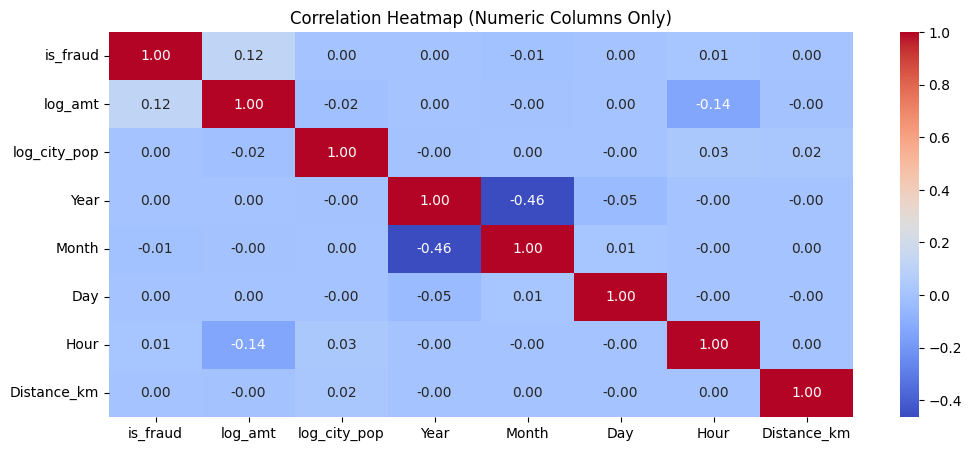

In [28]:
# Correlations Between Features

# Select only numeric columns 
numeric_data = Train_Data.select_dtypes(include=['float', 'int'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap 
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', cbar=True)
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

### ---------------------------------------------------------------------------------------------------------------------------------

## Visualise Fraud_Status(Target) with independent Columns

### ---------------------------------------------------------------------------------------------------------------------------------

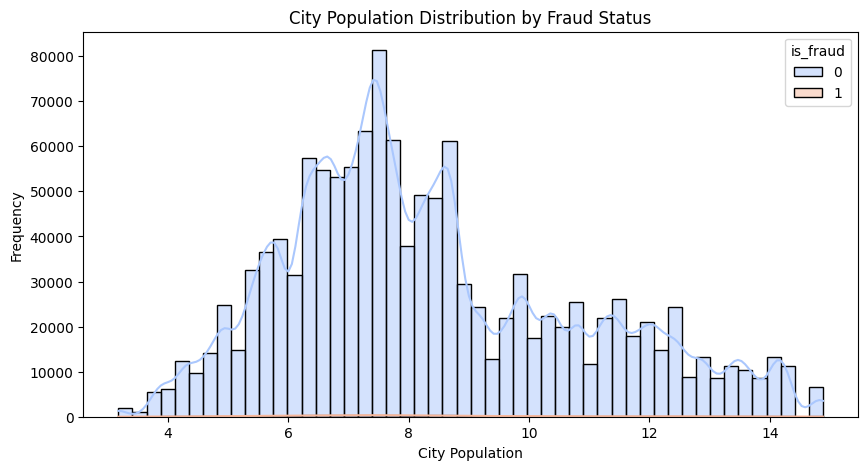

In [29]:
# Feature Importance Intuition

# City population distribution by fraud status
plt.figure(figsize=(10, 5))
sns.histplot(data=Train_Data, x="log_city_pop", hue="is_fraud", bins=50, kde=True, palette="coolwarm")
plt.title("City Population Distribution by Fraud Status")
plt.xlabel("City Population")
plt.ylabel("Frequency")
plt.show()

#### --------------------------------------------------------------------------------------------------------------------------------------------------------

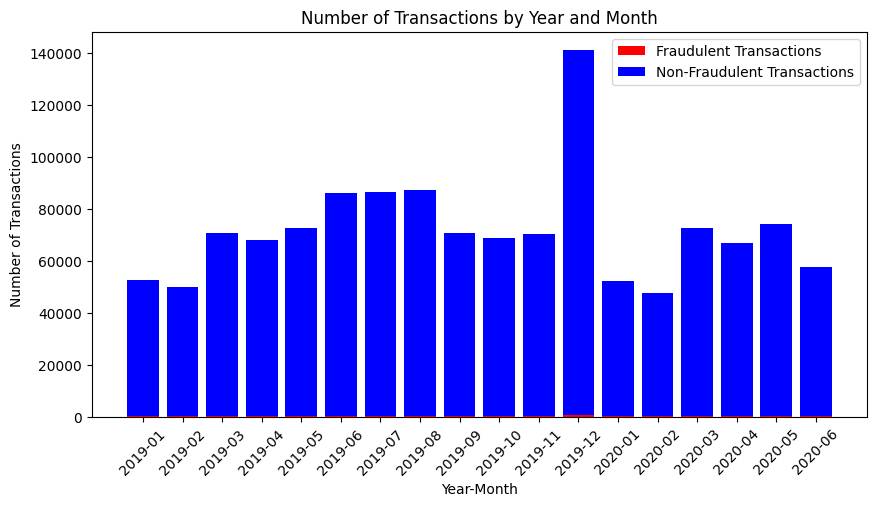

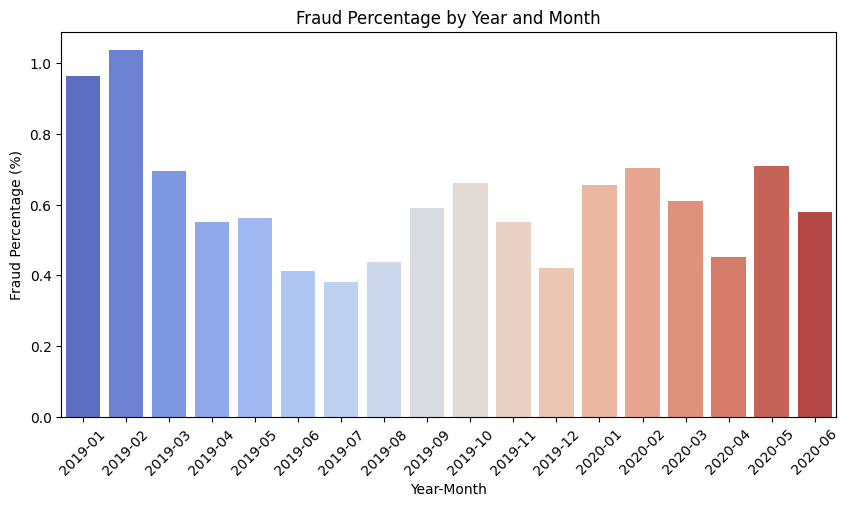

In [30]:
# Group non-fraudulent transactions by year and month
non_fraud_by_year_month = non_fraud_data.groupby(['Year', 'Month']).size().reset_index(name='non_fraud_count')

# Group fraudulent transactions by year and month
fraud_by_year_month = fraud_data.groupby(['Year', 'Month']).size().reset_index(name='fraud_count')

# Create a "Year-Month" column for better visualization
non_fraud_by_year_month['year_month'] = non_fraud_by_year_month['Year'].astype(str) + '-' + non_fraud_by_year_month['Month'].astype(str).str.zfill(2)
fraud_by_year_month['year_month'] = fraud_by_year_month['Year'].astype(str) + '-' + fraud_by_year_month['Month'].astype(str).str.zfill(2)

# Merging dataframes
merged_data = pd.merge(fraud_by_year_month, non_fraud_by_year_month, on='year_month', how='outer')

# Fill if, NaN values with 0
merged_data.fillna(0, inplace=True)

# Calculate the fraud percentage
merged_data['fraud_percentage'] = ( merged_data['fraud_count'] / (merged_data['fraud_count'] + merged_data['non_fraud_count'])) * 100

# Plot stacked bar chart (Fraud vs Non-Fraud Transactions)
plt.figure(figsize=(10, 5))
bar_width = 0.8
bar_positions = np.arange(len(merged_data))
plt.bar(bar_positions, merged_data['fraud_count'], bar_width, color='red', label='Fraudulent Transactions')
plt.bar(bar_positions, merged_data['non_fraud_count'], bar_width, color='blue', bottom=merged_data['fraud_count'], label='Non-Fraudulent Transactions')
plt.xticks(bar_positions, merged_data['year_month'], rotation=45)
plt.title("Number of Transactions by Year and Month")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.legend()
plt.show()

# Plot the fraud percentage
plt.figure(figsize=(10, 5))
sns.barplot(x='year_month', y='fraud_percentage', data=merged_data, palette='coolwarm')
plt.title("Fraud Percentage by Year and Month")
plt.xlabel("Year-Month")
plt.ylabel("Fraud Percentage (%)")
plt.xticks(rotation=45)
plt.show()

#### ----------------------------------------------------------------------------------------------------------------------------------------------------

##  Fraudulent transactions might have patterns based on :

In [31]:
# 1.Time of Day: Late-night transactions (e.g., midnight to early morning) might indicate fraud.

# Flag transactions based on the time of day
def flag_late_night_transactions(hour):
    # Define late-night hours (between 12 AM and 6 AM)
    return 1 if (hour >= 0 and hour < 6) else 0

# Add a flag for late-night transactions
Train_Data['Is_Late_Night'] = Train_Data['Hour'].apply(flag_late_night_transactions)

# Flag transactions on weekends
Train_Data['Is_Weekend'] = Train_Data['Day_of_Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

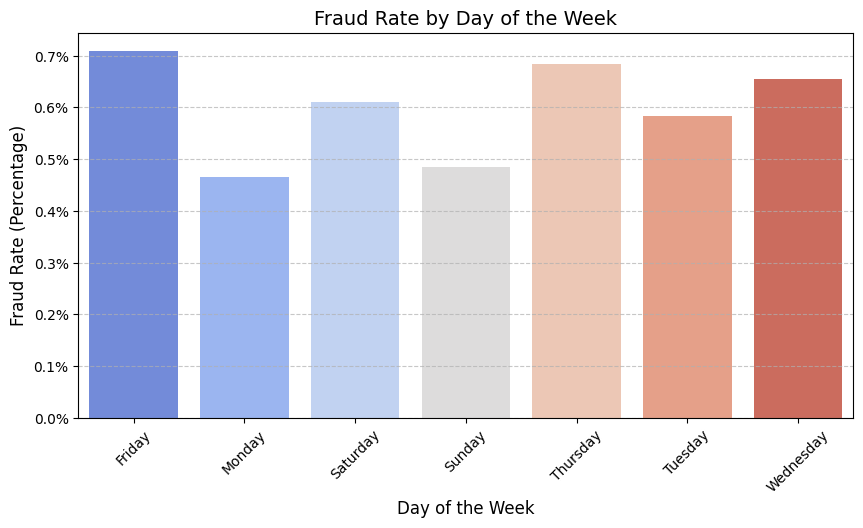

In [32]:
# 2. Day of the Week and Fraud
# check if fraud is more common on weekends or weekdays.

# Fraud rate by day of the week
plt.figure(figsize=(10, 5))
ax = sns.barplot( data=Train_Data.groupby('Day_of_Week')['is_fraud'].mean().reset_index(), x='Day_of_Week', y='is_fraud', palette='coolwarm' )

# y-axis to percentage
ax.set_yticklabels([f'{y*100:.1f}%' for y in ax.get_yticks()])
plt.title('Fraud Rate by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Fraud Rate (Percentage)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

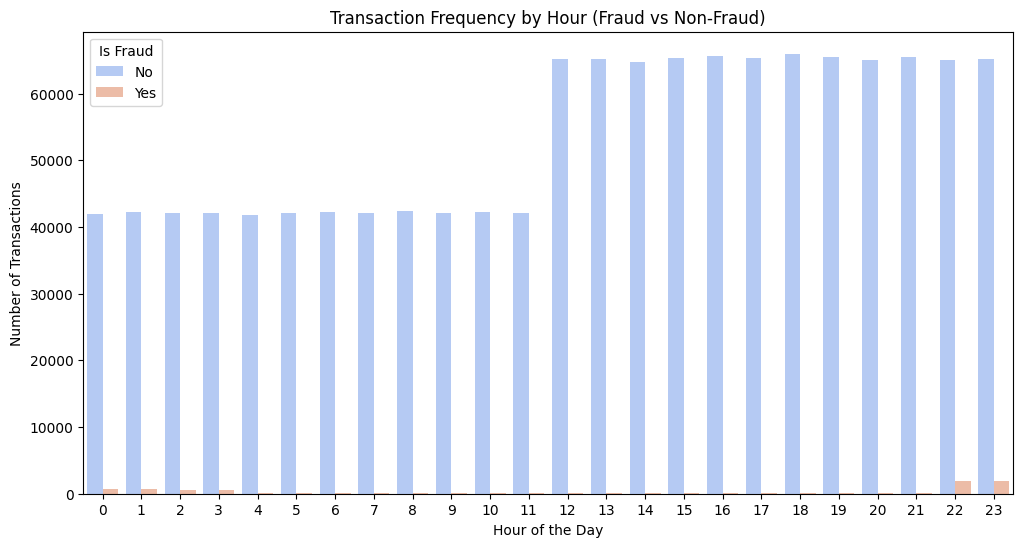

In [33]:
# 3. Time to Merchant Closing Hours (if available)
# If the merchant's operating hours are like 9am-9pm then, flag transactions outside of these hours.

# merchant working hours
merchant_open_hour = 9 # 9 AM
merchant_close_hour = 21 # 9 PM

# Flag transactions outside merchant hours
def flag_outside_working_hours(hour):
    return 1 if (hour < merchant_open_hour or hour >= merchant_close_hour) else 0

# Apply the flag
Train_Data['Is_Outside_Merchant_Hours'] = Train_Data['Hour'].apply(flag_outside_working_hours)


# 1. Visualizing Time of Day and Fraud
# Objective: Understand if fraudulent transactions are more common during specific times.
# Visualization: Use a bar plot or line plot to show the distribution of transactions across different hours, separated by fraud status.

# Bar plot: Transactions by hour (fraudulent vs. non-fraudulent)
plt.figure(figsize=(12, 6))
sns.countplot(data=Train_Data, x='Hour', hue='is_fraud', palette='coolwarm')
plt.title('Transaction Frequency by Hour (Fraud vs Non-Fraud)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

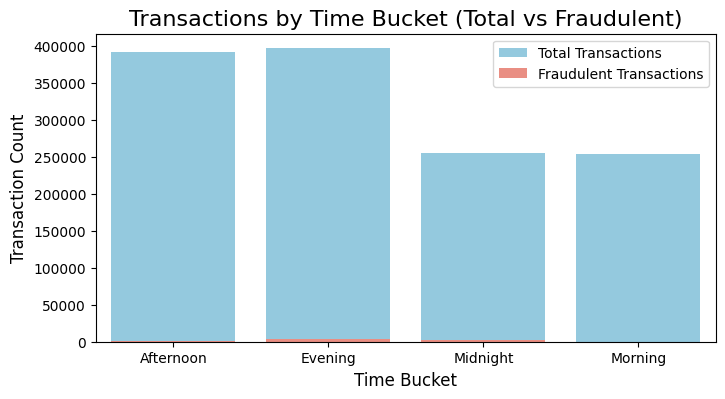

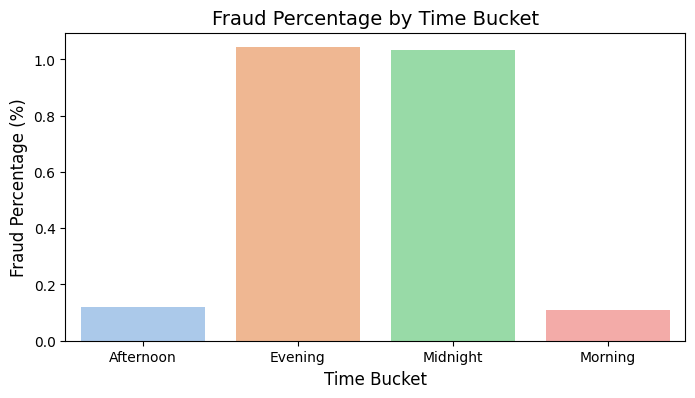

In [34]:
# Add columns ' time_bucket '
def time_bucket(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

Train_Data['Time_Bucket'] = Train_Data['Hour'].apply(time_bucket)

# Group by Time_Bucket and calculate total and fraudulent transactions
time_bucket_analysis = Train_Data.groupby('Time_Bucket')['is_fraud'].agg( Total_Transactions='count', Fraudulent_Transactions='sum' ).reset_index()

# Calculate the fraud percentage
time_bucket_analysis['Fraud_Percentage'] = (
    time_bucket_analysis['Fraudulent_Transactions'] / time_bucket_analysis['Total_Transactions'] ) * 100


# Plot total transactions and fraudulent transactions
plt.figure(figsize=(8, 4))

# Bar plot for total transactions
sns.barplot (x='Time_Bucket', y='Total_Transactions', data=time_bucket_analysis, color='skyblue', label='Total Transactions' )

# Bar plot for fraudulent transactions
sns.barplot (x='Time_Bucket', y='Fraudulent_Transactions', data=time_bucket_analysis, color='salmon', label='Fraudulent Transactions' )
plt.title('Transactions by Time Bucket (Total vs Fraudulent)', fontsize=16)
plt.xlabel('Time Bucket', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.legend()
plt.show()


# Plot fraud percentage
plt.figure(figsize=(8, 4))
sns.barplot ( x='Time_Bucket', y='Fraud_Percentage', data=time_bucket_analysis, palette='pastel' )
plt.title('Fraud Percentage by Time Bucket', fontsize=14)
plt.xlabel('Time Bucket', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.show()

#### Yes, graph shows us fraudlant transaction happened in before and after the 'working_hour'.

### -----------------------------------------------------------------------------------------------------------------------------------

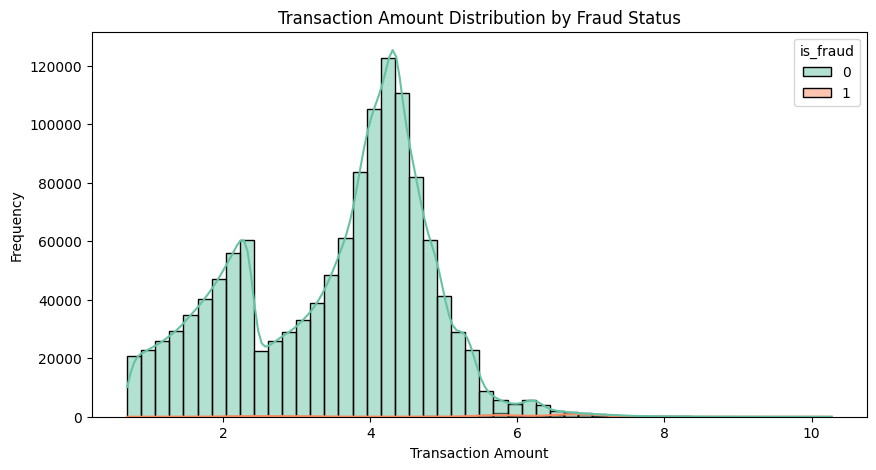

In [35]:
# Histograms for transaction amounts by fraud status
plt.figure(figsize=(10, 5))
sns.histplot(data=Train_Data, x="log_amt", hue="is_fraud", bins=50, kde=True, palette="Set2")
plt.title("Transaction Amount Distribution by Fraud Status")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

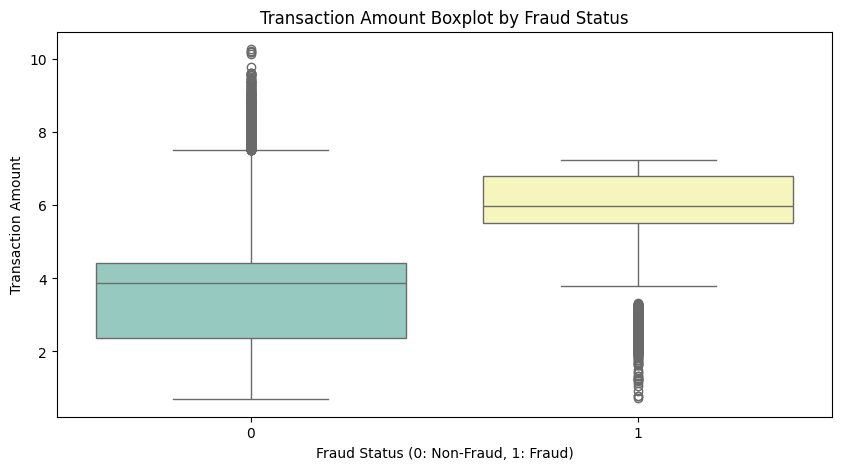

In [36]:
# Boxplot for transaction amounts
plt.figure(figsize=(10, 5))
sns.boxplot(data=Train_Data, x="is_fraud", y="log_amt", palette="Set3")
plt.title("Transaction Amount Boxplot by Fraud Status")
plt.xlabel("Fraud Status (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Transaction Amount")
plt.show()

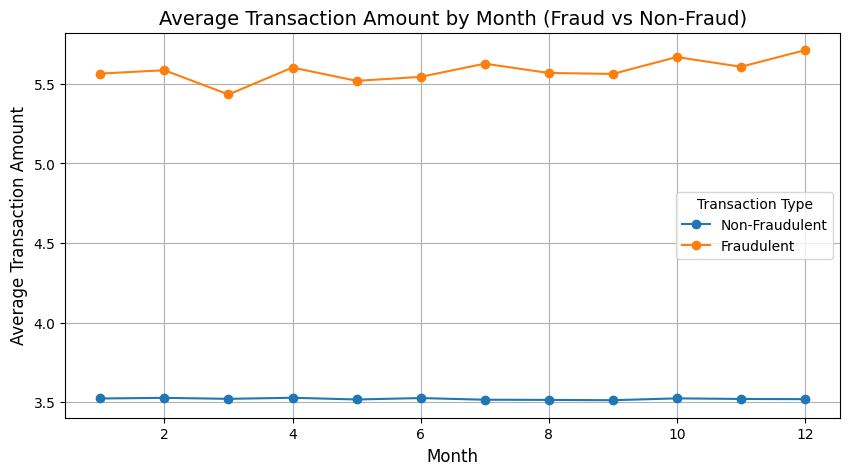

In [37]:
# Group by Month and is_fraud, then calculate mean transaction amount
avg_transaction_by_month_fraud = Train_Data.groupby(['Month', 'is_fraud'])['log_amt'].mean().reset_index()

# Pivot the data for easier plotting
avg_transaction_pivot = avg_transaction_by_month_fraud.pivot(index='Month', columns='is_fraud', values='log_amt')

# Plot
avg_transaction_pivot.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average Transaction Amount by Month (Fraud vs Non-Fraud)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Transaction Amount', fontsize=12)
plt.legend(['Non-Fraudulent', 'Fraudulent'], title="Transaction Type")
plt.grid(True)
plt.show()

## After Analysing all 3 Graph :

#### Fraudulent transactions tend to occur in a more specific range of amounts, while non-fraudulent transactions are more variable.

#### Fraud detection could potentially benefit from analyzing high-value transactions, as they might represent a higher likelihood of fraud, especially among the outliers.

#### Smaller transaction amounts dominate both fraud and non-fraud cases, but their distribution and variability differ significantly.

### ---------------------------------------------------------------------------------------------------------------------------------

## Analyze the Impact of Distance on Fraud

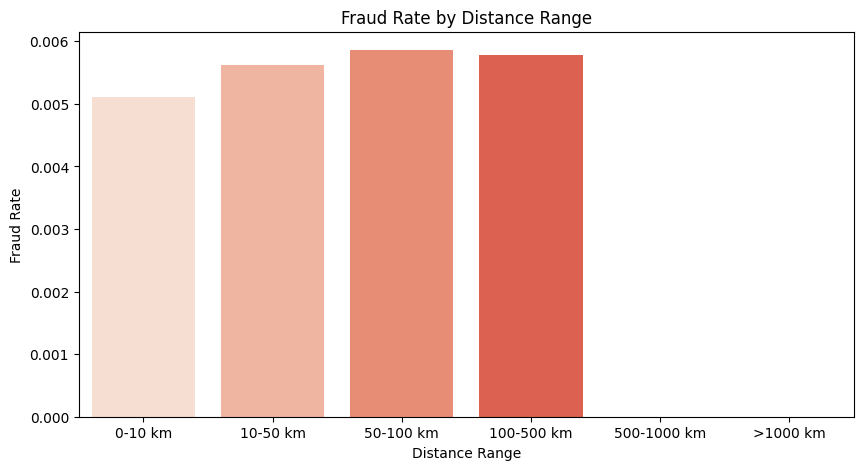

In [38]:
# Create distance bins
bins = [0, 10, 50, 100, 500, 1000, 5000]
labels = ['0-10 km', '10-50 km', '50-100 km', '100-500 km', '500-1000 km', '>1000 km']
Train_Data['Distance_range'] = pd.cut(Train_Data['Distance_km'], bins=bins, labels=labels)

# Analyze fraud rate by distance range
distance_fraud_analysis = Train_Data.groupby('Distance_range')['is_fraud'].mean()

# Plot fraud rate by distance range
plt.figure(figsize=(10, 5))
sns.barplot(x=distance_fraud_analysis.index, y=distance_fraud_analysis.values, palette='Reds')
plt.title('Fraud Rate by Distance Range')
plt.xlabel('Distance Range')
plt.ylabel('Fraud Rate')
plt.show()

### Yes, Fraudulent transactions occur more frequently when the customer and merchant are far apart 

### ---------------------------------------------------------------------------------------------------------------------------------

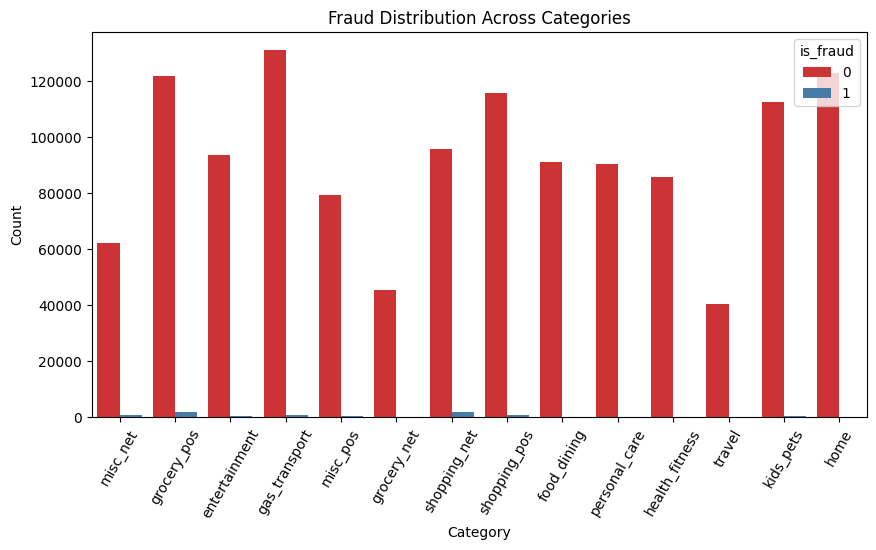

In [39]:
# Category-wise fraud distribution

plt.figure(figsize=(10, 5))
sns.countplot(data=Train_Data, x="category", hue="is_fraud", palette="Set1")
plt.title("Fraud Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

### ---------------------------------------------------------------------------------------------------------------------------------

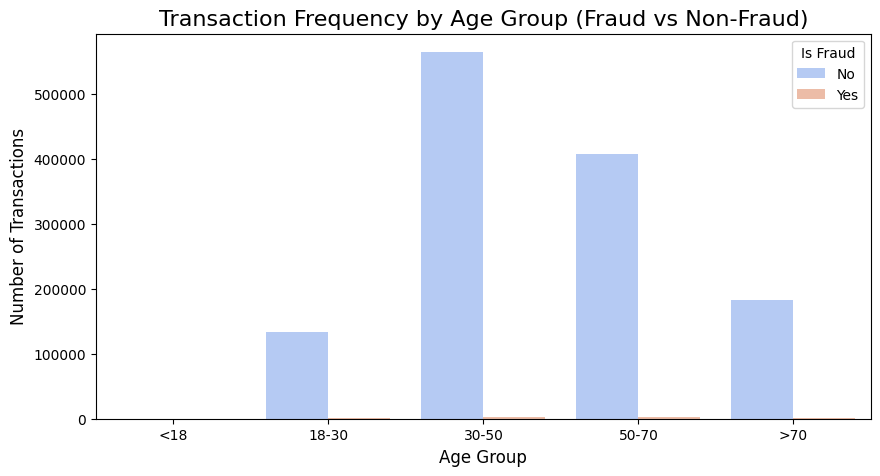

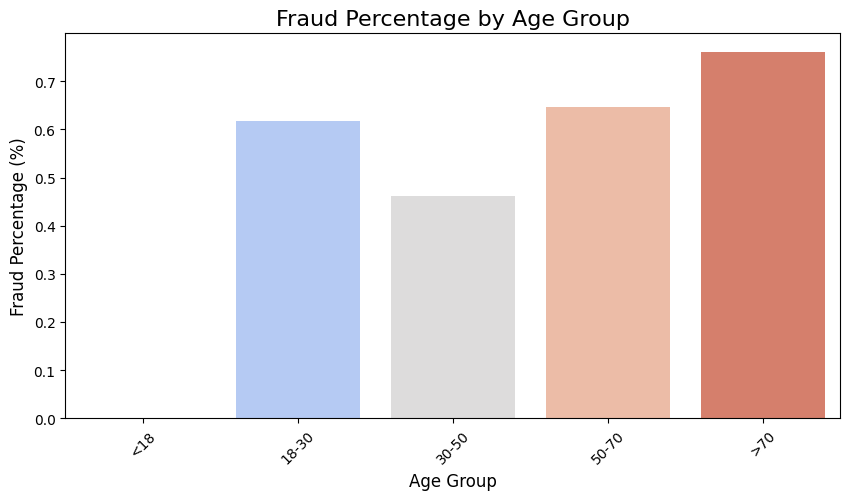

In [40]:
# Group by Age_Group and calculate total and fraudulent transactions
age_group_analysis = Train_Data.groupby('Age_Group')['is_fraud'].agg( Total_Transactions='count', Fraudulent_Transactions='sum' ).reset_index()

# Calculate fraud percentage
age_group_analysis['Fraud_Percentage'] = (
    age_group_analysis['Fraudulent_Transactions'] / age_group_analysis['Total_Transactions'] ) * 100

# Plot: Transactions by Age_Group (Fraudulent vs. Non-Fraudulent)
plt.figure(figsize=(10, 5))
sns.countplot(data=Train_Data, x='Age_Group', hue='is_fraud', palette='coolwarm')
plt.title('Transaction Frequency by Age Group (Fraud vs Non-Fraud)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.legend(title='Is Fraud', labels=['No', 'Yes'])  
plt.show()

# Plot: Fraud Percentage by Age_Group
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Fraud_Percentage', data=age_group_analysis, palette='coolwarm')
plt.title('Fraud Percentage by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Fraud Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### "Elderly" & "Aged person" are likely found in Fraudlant transaction case.

### ---------------------------------------------------------------------------------------------------------------------------------

## Distribution Plots for "Numerical" Features

In [ ]:
numerical_features = Train_Data.select_dtypes(include=['float', 'int'])
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(Train_Data[feature], kde=True, color="blue", bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


    # Print mode and other statistics for the feature
    print(f"Analysis for '{feature}':")
    print(f"Unique Values Count : {numerical_features[feature].nunique()}")
    print(f"Unique Values Count : {numerical_features[feature].value_counts()}\n")
    print(f"Mean Value : {numerical_features[feature].mean():.2f}")
    print(f"Median Value : {numerical_features[feature].median():.2f}")
    print(f"Mode (Most Frequent Value) : {numerical_features[feature].mode()[0]}")
    print(f"Variance : {numerical_features[feature].var():.2f}")
    print(f"Standard Deviation : {numerical_features[feature].std():.2f}")
    print("-" * 90)
    print("\n")

### ---------------------------------------------------------------------------------------------------------------------------------

## Distribution Plots for "Categorical" features

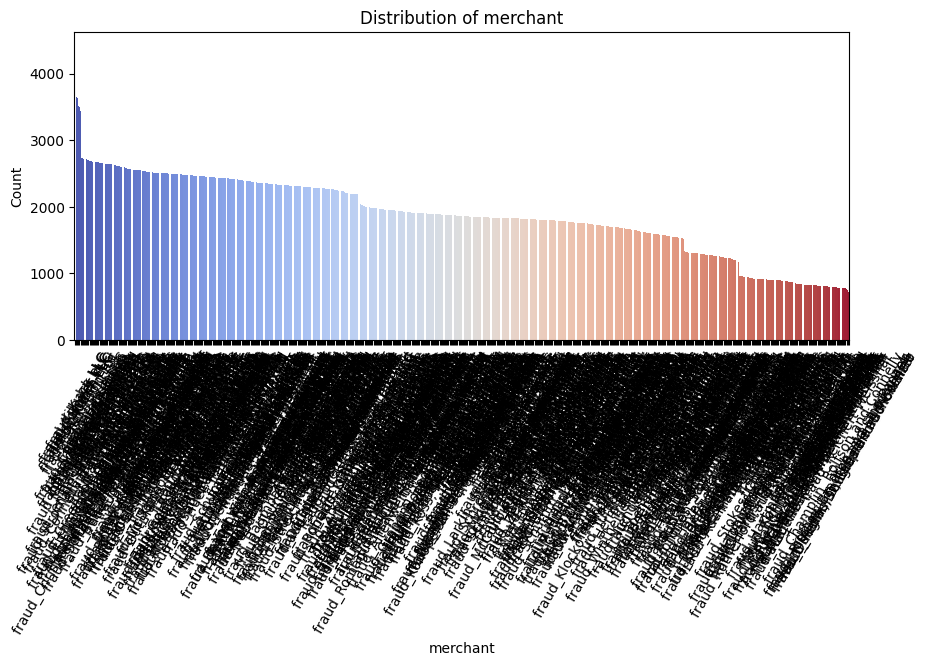

Analysis for 'merchant':
Unique Values Count : merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

Unique Values Count : 693
Mode (Most Frequent Value) : fraud_Kilback LLC
Unique Values : ['fraud_Rippin, Kub and Mann' 'fraud_Heller, Gutmann and Zieme'
 'fraud_Lind-Buckridge' 'fraud_Kutch, Hermiston and Farrell'
 'fraud_Keeling-Crist']...
------------------------------------------------------------------------------------------




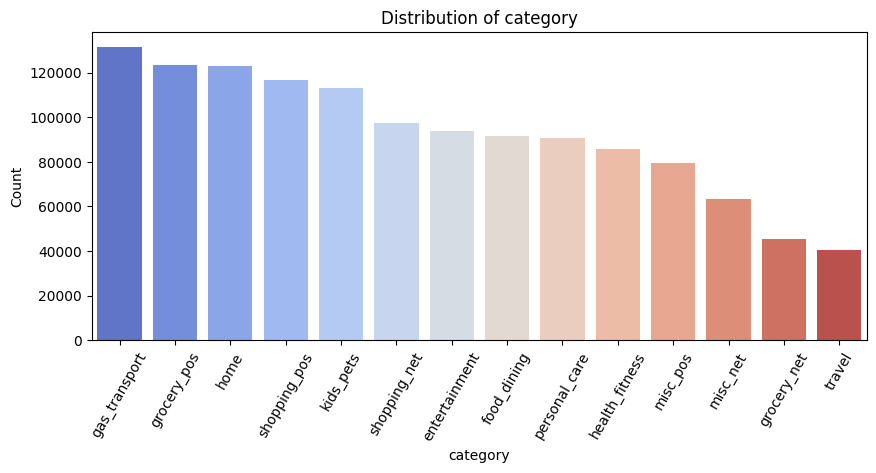

Analysis for 'category':
Unique Values Count : category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

Unique Values Count : 14
Mode (Most Frequent Value) : gas_transport
Unique Values : ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos']...
------------------------------------------------------------------------------------------




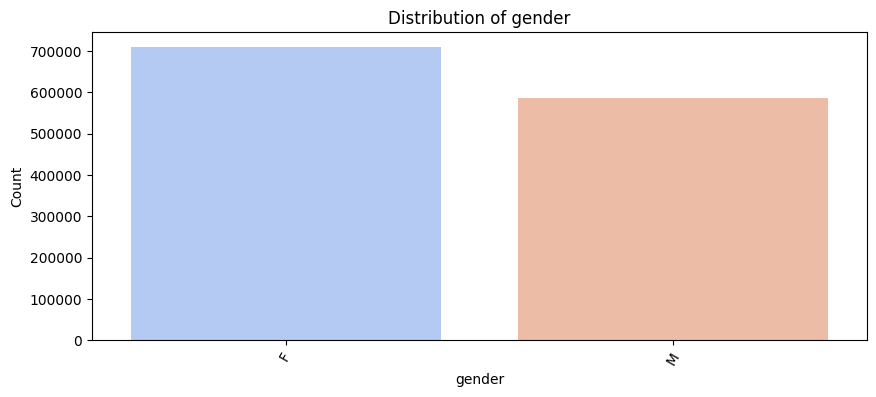

Analysis for 'gender':
Unique Values Count : gender
F    709863
M    586812
Name: count, dtype: int64

Unique Values Count : 2
Mode (Most Frequent Value) : F
Unique Values : ['F' 'M']
------------------------------------------------------------------------------------------




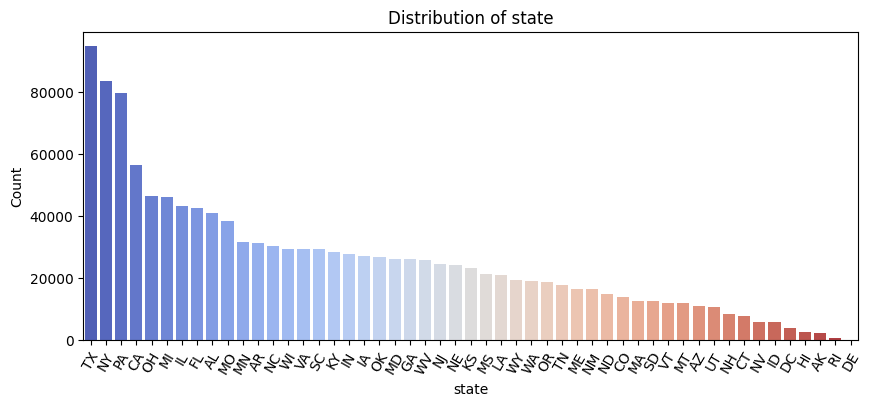

Analysis for 'state':
Unique Values Count : state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64

Unique Values Count : 51
Mode (Most Frequent Value) : TX
Unique Values : ['NC' 'WA' 'ID' 'MT' 'VA']...
------------------------------------------------------------------------------------------




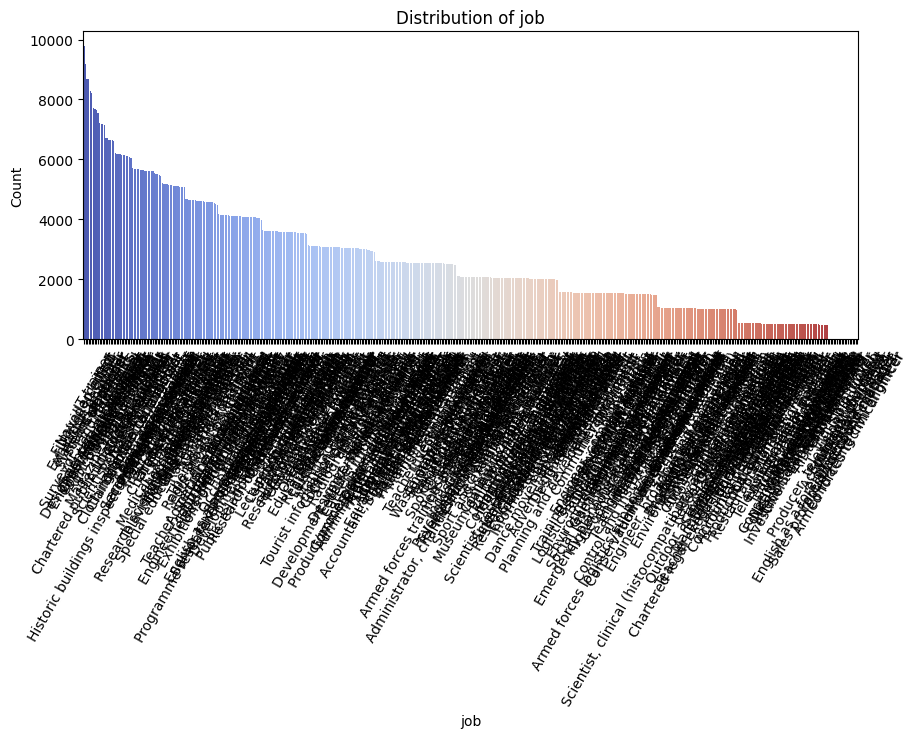

Analysis for 'job':
Unique Values Count : job
Film/video editor             9779
Exhibition designer           9199
Naval architect               8684
Surveyor, land/geomatics      8680
Materials engineer            8270
                              ... 
Information officer              8
Veterinary surgeon               8
Ship broker                      7
Contracting civil engineer       7
Warehouse manager                7
Name: count, Length: 494, dtype: int64

Unique Values Count : 494
Mode (Most Frequent Value) : Film/video editor
Unique Values : ['Psychologist, counselling' 'Special educational needs teacher'
 'Nature conservation officer' 'Patent attorney'
 'Dance movement psychotherapist']...
------------------------------------------------------------------------------------------




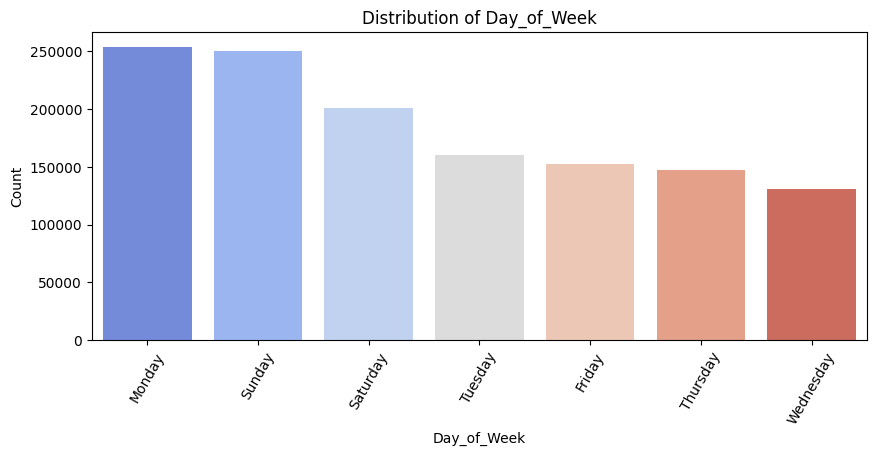

Analysis for 'Day_of_Week':
Unique Values Count : Day_of_Week
Monday       254282
Sunday       250579
Saturday     200957
Tuesday      160227
Friday       152272
Thursday     147285
Wednesday    131073
Name: count, dtype: int64

Unique Values Count : 7
Mode (Most Frequent Value) : Monday
Unique Values : ['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']...
------------------------------------------------------------------------------------------




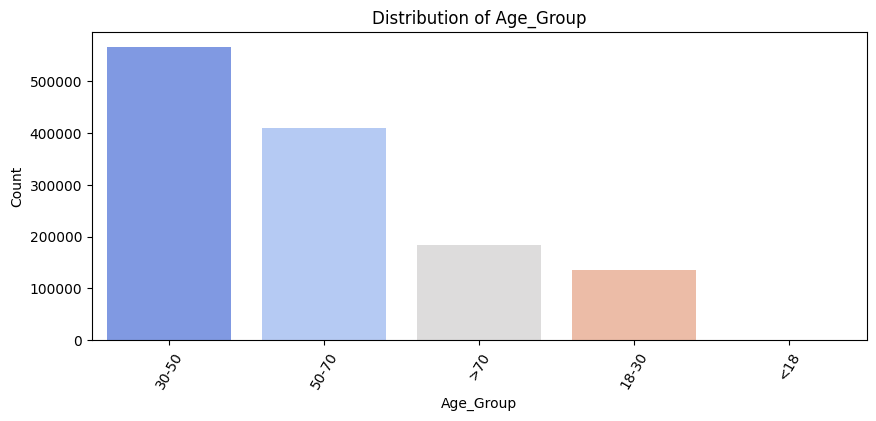

Analysis for 'Age_Group':
Unique Values Count : Age_Group
30-50    567369
50-70    410681
>70      183803
18-30    134822
<18           0
Name: count, dtype: int64

Unique Values Count : 4
Mode (Most Frequent Value) : 30-50
Unique Values : ['30-50', '50-70', '>70', '18-30']
Categories (5, object): ['<18' < '18-30' < '30-50' < '50-70' < '>70']
------------------------------------------------------------------------------------------




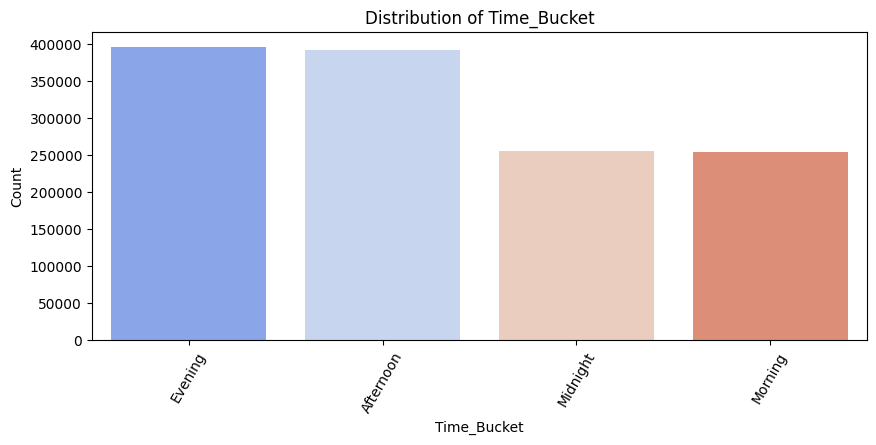

Analysis for 'Time_Bucket':
Unique Values Count : Time_Bucket
Evening      396276
Afternoon    392023
Midnight     254830
Morning      253546
Name: count, dtype: int64

Unique Values Count : 4
Mode (Most Frequent Value) : Evening
Unique Values : ['Midnight' 'Morning' 'Afternoon' 'Evening']
------------------------------------------------------------------------------------------




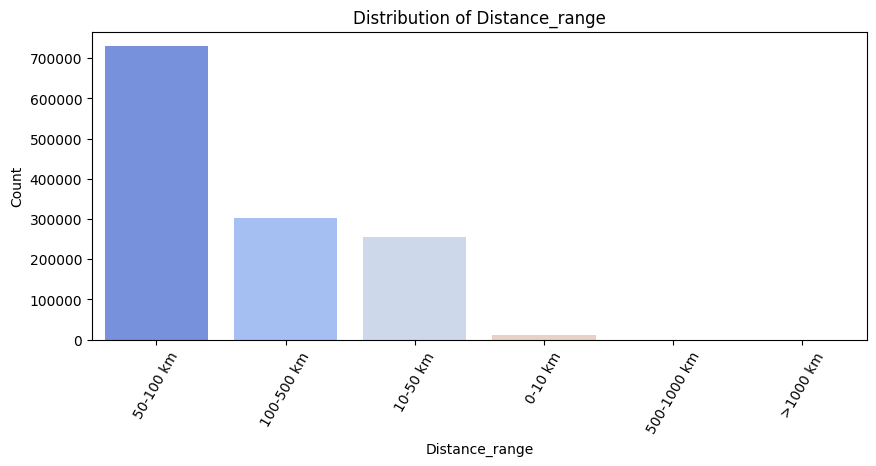

Analysis for 'Distance_range':
Unique Values Count : Distance_range
50-100 km      729384
100-500 km     302292
10-50 km       254445
0-10 km         10554
500-1000 km         0
>1000 km            0
Name: count, dtype: int64

Unique Values Count : 4
Mode (Most Frequent Value) : 50-100 km
Unique Values : ['50-100 km', '10-50 km', '100-500 km', '0-10 km']
Categories (6, object): ['0-10 km' < '10-50 km' < '50-100 km' < '100-500 km' < '500-1000 km' < '>1000 km']
------------------------------------------------------------------------------------------




In [42]:
categorical_features = Train_Data.select_dtypes(include=['object', 'category'])

# Iterate through categorical features
for feature in categorical_features:
    # Plot the distribution of the feature
    plt.figure(figsize=(10, 4))
    sns.countplot(data=categorical_features, x=feature, palette="coolwarm", order=categorical_features[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=60)  
    plt.show()
    
    # Print mode and unique value statistics for the feature
    print(f"Analysis for '{feature}':")
    print(f"Unique Values Count : {categorical_features[feature].value_counts()}\n")
    print(f"Unique Values Count : {categorical_features[feature].nunique()}")
    print(f"Mode (Most Frequent Value) : {categorical_features[feature].mode()[0]}")
    print(f"Unique Values : {categorical_features[feature].unique()[:5]}{'...' if categorical_features[feature].nunique() > 5 else ''}")  # top 5
    print("-" * 90)
    print("\n")

### ---------------------------------------------------------------------------------------------------------------------------------

In [43]:
# We are copying data because if we get error in future, we can start from here.
Train_Data_1 = Train_Data.copy()

### ---------------------------------------------------------------------------------------------------------------------------------

### State has 51 Unique value but we cant ignore because it has valuable insight and we will use in machine learning.

In [44]:
# Frequency count of each state
state_counts = Train_Data_1['state'].value_counts()

# Set threshold for frequency-based grouping (for low-frequency states)
threshold = 20000  # We can Adjust the threshold 
Train_Data_1['state_grouped'] = Train_Data_1['state'].apply(lambda x: x if state_counts[x] >= threshold else 'Other')

# Now, encode the grouped states (Label Encoding)
state_encoder = LabelEncoder()

state_encoder = LabelEncoder()
Train_Data_1['state_grouped_encoded'] = state_encoder.fit_transform(Train_Data_1['state_grouped'])

### High-frequency states: States like TX, NY, PA, CA, etc., have frequency , puting them separately .
### Low-frequency states: States like RI, DE, HI, AK, etc., have law occurrences , puting them into other group .

### ---------------------------------------------------------------------------------------------------------------------------------

## Merchant Column (Frequency Encoding)

In [45]:
# Frequency encoding means encoding the merchant based on his fraud transactions.

merchant_counts = Train_Data_1['merchant'].value_counts()
Train_Data_1['merchant_encoded'] = Train_Data_1['merchant'].map(merchant_counts)

## Job Column (Frequency Encoding)

In [46]:
# The job column will also be encoded using frequency encoding.

job_counts = Train_Data_1['job'].value_counts()
Train_Data_1['job_encoded'] = Train_Data_1['job'].map(job_counts)

### ---------------------------------------------------------------------------------------------------------------------------------

In [47]:
Train_Data_2 = Train_Data_1.copy()

In [48]:
# Removing unused columns
Train_Data_2.drop(columns=['Distance_range', 'merchant', 'job', 'Time_Bucket', 'state', 'state_grouped'], inplace=True)

# One-Hot Encoding for 'category', 'gender', 'Day_of_Week', 'state_grouped', 'merchant_grouped', 'job_grouped'
Train_Data_2 = pd.get_dummies(Train_Data_2, columns=['category', 'gender', 'Day_of_Week', 'Age_Group'])

# Scaling numeric columns
scaler = StandardScaler()

numeric_cols = ['log_amt', 'log_city_pop', 'Distance_km', 'Year', 'Month', 'Day', 'Hour', 'state_grouped_encoded', 'merchant_encoded', 'job_encoded']

Train_Data_2[numeric_cols] = scaler.fit_transform(Train_Data_2[numeric_cols])

Train_Data_2 = Train_Data_2.rename(columns = { 'Age_Group_<18': 'Age_Group_below_18', 'Age_Group_18-30': 'Age_Group_18_to_30', 
                                              'Age_Group_30-50': 'Age_Group_30_to_50','Age_Group_50-70': 'Age_Group_50_to_70', 
                                              'Age_Group_>70': 'Age_Group_above_70' })

In [49]:
# Select Boolean columns
boolean_columns = Train_Data_2.select_dtypes(include=['bool']).columns

# Convert Boolean columns to numeric
for col in boolean_columns:
    Train_Data_2[col] = Train_Data_2[col].astype(int)

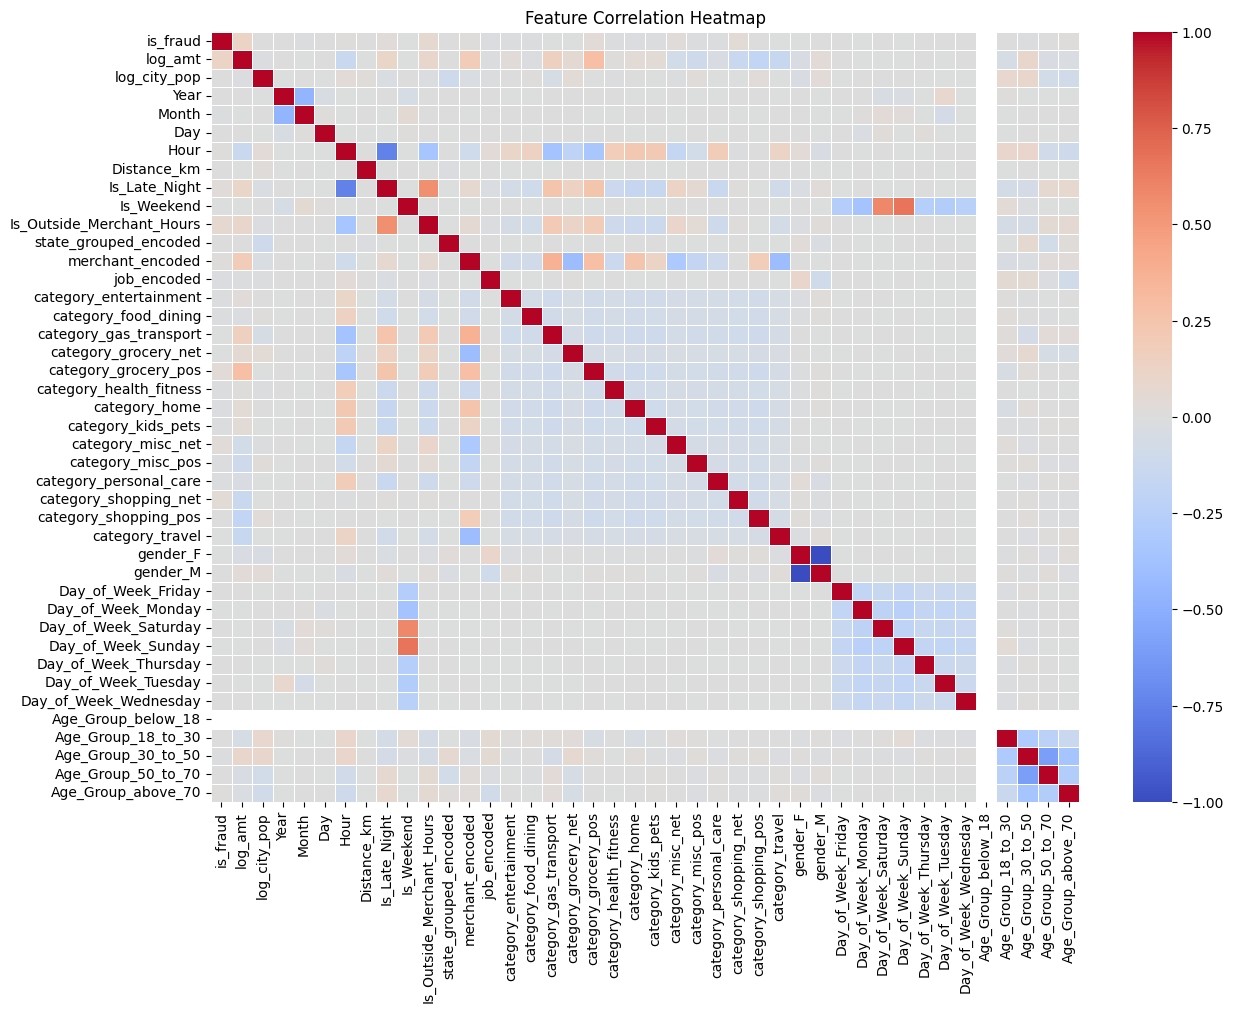

In [50]:
# Correlation matrix
correlation_matrix = Train_Data_2.corr()

# heatmap 
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [51]:
Train_Data_3 = Train_Data_2.copy()

# 3. Model Interpretability

## Global Feature Importance :
### Top features for model-level analysis (e.g., feature importance plot of a random forest).

In [52]:
# Define features (drop target column)
X = Train_Data_3.drop(columns=['is_fraud'])
y = Train_Data_3['is_fraud']

In [53]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Train Random Forest
model = RandomForestClassifier(random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [55]:
# Get feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

In [56]:
print("Top Features Based on Importance :")
print(feature_importances)

Top Features Based on Importance:
                      Feature  Importance
0                     log_amt    0.439286
5                        Hour    0.064572
11           merchant_encoded    0.062647
12                job_encoded    0.056883
1                log_city_pop    0.043956
6                 Distance_km    0.041138
17       category_grocery_pos    0.038301
4                         Day    0.027743
10      state_grouped_encoded    0.024120
3                       Month    0.020994
38         Age_Group_30_to_50    0.017153
15     category_gas_transport    0.014289
40         Age_Group_above_70    0.013046
37         Age_Group_18_to_30    0.011345
9   Is_Outside_Merchant_Hours    0.010183
39         Age_Group_50_to_70    0.009284
27                   gender_F    0.009059
21          category_misc_net    0.008899
24      category_shopping_net    0.008529
28                   gender_M    0.007926
22          category_misc_pos    0.007660
7               Is_Late_Night    0.006201


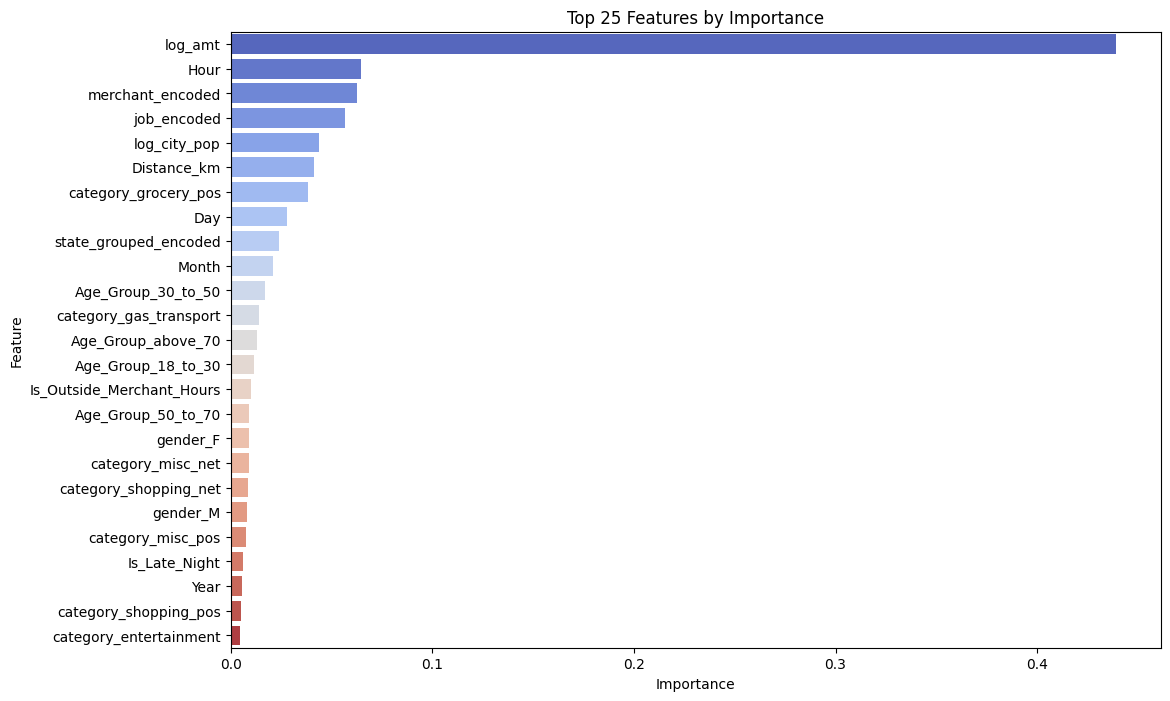

In [57]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances.head(25), x='Importance', y='Feature', palette="coolwarm")
plt.title("Top 25 Features by Importance")
plt.show()

In [58]:
# Creating new Dataset which has top important columns (features)
New_important_Feature_columns = feature_importances.head(25).reset_index(drop=True)

In [59]:
New_important_Feature_columns

,Feature,Importance
0,log_amt,0.439286
1,Hour,0.064572
2,merchant_encoded,0.062647
3,job_encoded,0.056883
4,log_city_pop,0.043956
5,Distance_km,0.041138
6,category_grocery_pos,0.038301
7,Day,0.027743
8,state_grouped_encoded,0.024120
9,Month,0.020994


In [60]:
Train_Data_Set_1 = Train_Data_3.copy()

# 4. Model Building

## Without Sampling :

In [61]:
Train_Data_Set_1['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [62]:
# Creating independent (X) & Target (y) dataset for Train_Test_Split
X = Train_Data_3.drop('is_fraud', axis=1)
y = Train_Data_3['is_fraud']

In [63]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(907672, 41)
(389003, 41)
(907672,)
(389003,)


### (A) Logistic Regression

In [65]:
# Train Logistic Regression model
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression()

In [66]:
# Predict on the training data
y_train_pred = model_1.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred_class)
precision = precision_score(y_train, y_train_pred_class)
recall = recall_score(y_train, y_train_pred_class)
f1 = f1_score(y_train, y_train_pred_class)

# Evaluation
print("Classification Report for Training Data")
print(classification_report(y_train, y_train_pred_class))

# Confusion matrix
cm = confusion_matrix(y_train, y_train_pred_class)
print(" \n Confusion Matrix")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_train, y_train_pred_class)
pr_auc_score = average_precision_score(y_train, y_train_pred_class)

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902451
           1       0.84      0.23      0.36      5221

    accuracy                           1.00    907672
   macro avg       0.92      0.62      0.68    907672
weighted avg       0.99      1.00      0.99    907672

 
 Confusion Matrix
[[902223    228]
 [  4010   1211]]


In [67]:
# Store results in a DataFrame
res_log_w_s_train = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_log_w_s_train

,Metric,Value
0,Accuracy,0.995331
1,Precision,0.841557
2,Recall,0.231948
3,F1-Score,0.363664
4,ROC-AUC,0.615848
5,PR-AUC,0.199615


In [68]:
# Predict on the test set
y_test_pred = model_1.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_test_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_test_pred_class)
pr_auc_score = average_precision_score(y_test, y_test_pred_class)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.85      0.25      0.39      2285

    accuracy                           1.00    389003
   macro avg       0.92      0.63      0.69    389003
weighted avg       0.99      1.00      0.99    389003

 
 Confusion Matrix 
[[386612    106]
 [  1704    581]]


In [69]:
# Store results in a DataFrame
res_log_w_s_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_log_w_s_test 

,Metric,Value
0,Accuracy,0.995347
1,Precision,0.845706
2,Recall,0.254267
3,F1-Score,0.390983
4,ROC-AUC,0.626996
5,PR-AUC,0.219416


### The low recall values (0.23 for train and 0.25 for test) indicate that the model is struggling to predict the minority class.
### The F1-score, which balances precision and recall, is also low (0.36 for train and 0.39 for test), reinforcing the idea that the model is not performing well on the minority class.

### The dataset is highly imbalanced, making it challenging for the model to learn effective features for the minority class.


### (B) Random Forest

In [70]:
# Train a Random Forest model
model_2 = RandomForestClassifier(random_state=42, n_jobs=-1)
model_2.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [71]:
# Predict on the training data
y_train_pred = model_2.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred_class)
precision = precision_score(y_train, y_train_pred_class)
recall = recall_score(y_train, y_train_pred_class)
f1 = f1_score(y_train, y_train_pred_class)

# Evaluation
print("Classification Report for Training Data")
print(classification_report(y_train, y_train_pred_class))

# Confusion matrix
cm= confusion_matrix(y_train, y_train_pred_class)
print(" \n Confusion Matrix")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_train, y_train_pred_class)
pr_auc_score = average_precision_score(y_train, y_train_pred_class)

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902451
           1       1.00      1.00      1.00      5221

    accuracy                           1.00    907672
   macro avg       1.00      1.00      1.00    907672
weighted avg       1.00      1.00      1.00    907672

 
 Confusion Matrix
[[902451      0]
 [     3   5218]]


In [72]:
# Store results in a DataFrame
res_rf_w_s_train = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score]})

res_rf_w_s_train 

,Metric,Value
0,Accuracy,0.999997
1,Precision,1.000000
2,Recall,0.999425
3,F1-Score,0.999713
4,ROC-AUC,0.999713
5,PR-AUC,0.999429


In [73]:
# Predict on the test set
y_test_pred = model_2.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_test_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_test_pred_class)
pr_auc_score = average_precision_score(y_test, y_test_pred_class)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.98      0.73      0.83      2285

    accuracy                           1.00    389003
   macro avg       0.99      0.86      0.92    389003
weighted avg       1.00      1.00      1.00    389003

 
 Confusion Matrix 
[[386681     37]
 [   624   1661]]


In [74]:
# Store results in a DataFrame
res_rf_w_s_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_w_s_test  

,Metric,Value
0,Accuracy,0.998301
1,Precision,0.978210
2,Recall,0.726915
3,F1-Score,0.834045
4,ROC-AUC,0.863409
5,PR-AUC,0.712679



#### The train metrics are perfect (Accuracy: 1.00, Precision: 1.00, Recall: 1.00, F1-Score: 1.00)
#### The test metrics, however, are significantly lower (Accuracy: 1.00, Precision: 0.98, Recall: 0.73, F1-Score: 0.84)

#### The model might be slightly overfitting to the training data, as evidenced by the perfect recall on the training data but lower recall on the test data.
#### The precision on the test data is still high, indicating that the model is good at predicting positive instances.
#### The recall on the test data is lower than on the training data, suggesting that the model might be missing some positive instances in the test data.


#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Over-sampling (SMOTE)

In [75]:
Train_Data_Set_1 = Train_Data_3.copy()

In [76]:
Train_Data_Set_1['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [77]:
# Creating independent (X) & Target (y) dataset for Train_Test_Split
X = Train_Data_3.drop('is_fraud', axis=1)
y = Train_Data_3['is_fraud']

In [78]:
print(X.shape)
print(y.shape)

(1296675, 41)
(1296675,)


In [79]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(907672, 41)
(389003, 41)
(907672,)
(389003,)


In [81]:
# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote_res, y_train_smote_res = smote.fit_resample(X_train, y_train)

In [82]:
print(X_train_smote_res.shape)
print(y_train_smote_res.shape)

(1804902, 41)
(1804902,)


## (A) Logistic Regression Model

In [83]:
# Train Logistic Regression model
model_3 = LogisticRegression()
model_3.fit(X_train_smote_res, y_train_smote_res)

LogisticRegression()

In [84]:
# Predict on the training data
y_train_pred = model_3.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred_class)
precision = precision_score(y_train, y_train_pred_class)
recall = recall_score(y_train, y_train_pred_class)
f1 = f1_score(y_train, y_train_pred_class)

# Evaluation
print("Classification Report for Training Data")
print(classification_report(y_train, y_train_pred_class))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred_class)
print(" \n Confusion Matrix")
print(cm_train)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_train, y_train_pred_class)
pr_auc_score = average_precision_score(y_train, y_train_pred_class)

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    902451
           1       0.13      0.65      0.22      5221

    accuracy                           0.97    907672
   macro avg       0.56      0.81      0.60    907672
weighted avg       0.99      0.97      0.98    907672

 
 Confusion Matrix
[[879673  22778]
 [  1814   3407]]


In [85]:
# Store results in a DataFrame
res_log_o_s_train = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_log_o_s_train  

,Metric,Value
0,Accuracy,0.972907
1,Precision,0.130113
2,Recall,0.652557
3,F1-Score,0.216965
4,ROC-AUC,0.813658
5,PR-AUC,0.086904


In [86]:
# Predict on the test set
y_test_pred = model_3.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_test_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_test_pred_class)
pr_auc_score = average_precision_score(y_test, y_test_pred_class)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    386718
           1       0.14      0.67      0.23      2285

    accuracy                           0.97    389003
   macro avg       0.57      0.82      0.61    389003
weighted avg       0.99      0.97      0.98    389003

 
 Confusion Matrix 
[[377048   9670]
 [   746   1539]]


In [87]:
# Store results in a DataFrame
res_log_o_s_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_log_o_s_test   

,Metric,Value
0,Accuracy,0.973224
1,Precision,0.137300
2,Recall,0.673523
3,F1-Score,0.228101
4,ROC-AUC,0.824259
5,PR-AUC,0.094393


### SMOTE oversampling has helped to reduce the class imbalance issue, but it has also introduced a new problem: the model is now predicting many false positives.
### The model's precision has decreased significantly, which may not be desirable in certain applications.
### The recall has improved, but it's still not perfect.

## (B) Random Forest Model

In [88]:
# Train a Random Forest model
model_4 = RandomForestClassifier(random_state=42, n_jobs=-1)
model_4.fit(X_train_smote_res, y_train_smote_res)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [89]:
# Predict on the training data
y_train_pred = model_4.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype('int32')

# Calculate metrics
accuracy_train = accuracy_score(y_train, y_train_pred_class)
precision_train = precision_score(y_train, y_train_pred_class)
recall_train = recall_score(y_train, y_train_pred_class)
f1_train = f1_score(y_train, y_train_pred_class)

# Evaluation
print("Classification Report for Training Data")
print(classification_report(y_train, y_train_pred_class))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred_class)
print(" \n Confusion Matrix")
print(cm_train)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_train, y_train_pred_class)
pr_auc_score = average_precision_score(y_train, y_train_pred_class)

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902451
           1       1.00      1.00      1.00      5221

    accuracy                           1.00    907672
   macro avg       1.00      1.00      1.00    907672
weighted avg       1.00      1.00      1.00    907672

 
 Confusion Matrix
[[902451      0]
 [     0   5221]]


In [90]:
# Store results in a DataFrame
res_rf_o_s_train = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_o_s_train  

,Metric,Value
0,Accuracy,0.973224
1,Precision,0.137300
2,Recall,0.673523
3,F1-Score,0.228101
4,ROC-AUC,1.000000
5,PR-AUC,1.000000


In [91]:
# Predict on the test set
y_test_pred = model_4.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_test_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_test_pred_class)
pr_auc_score = average_precision_score(y_test, y_test_pred_class)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.92      0.78      0.85      2285

    accuracy                           1.00    389003
   macro avg       0.96      0.89      0.92    389003
weighted avg       1.00      1.00      1.00    389003

 
 Confusion Matrix 
[[386573    145]
 [   498   1787]]


In [92]:
# Store results in a DataFrame
res_rf_o_s_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_o_s_test 

,Metric,Value
0,Accuracy,0.998347
1,Precision,0.924948
2,Recall,0.782057
3,F1-Score,0.847522
4,ROC-AUC,0.890841
5,PR-AUC,0.724642


### SMOTE oversampling has helped improve the model's performance on the minority class.
### The model's performance on the test data is significantly better than on the training data, which is unusual.
### The precision on the test data is much higher than on the training data, which may indicate overfitting to the test data.

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

## Under-Sampling (RandomUnderSampler)

## Random Forest Model

In [93]:
# Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under_res, y_train_under_res = under_sampler.fit_resample(X_train, y_train)

In [94]:
print(X_train_under_res.shape)
print(y_train_under_res.shape)

(10442, 41)
(10442,)


In [95]:
# Train a Random Forest model
model_5 = RandomForestClassifier(random_state=42, n_jobs=-1)
model_5.fit(X_train_under_res, y_train_under_res)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [96]:
# Predict on the training data
y_train_pred = model_5.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred_class)
precision = precision_score(y_train, y_train_pred_class)
recall = recall_score(y_train, y_train_pred_class)
f1 = f1_score(y_train, y_train_pred_class)

# Evaluation
print("Classification Report for Training Data")
print(classification_report(y_train, y_train_pred_class))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred_class)
print("\nConfusion Matrix")
print(cm_train)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_train, y_train_pred_class)
pr_auc_score = average_precision_score(y_train, y_train_pred_class)

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    902451
           1       0.17      1.00      0.29      5221

    accuracy                           0.97    907672
   macro avg       0.58      0.99      0.64    907672
weighted avg       1.00      0.97      0.98    907672


Confusion Matrix
[[876732  25719]
 [     0   5221]]


In [97]:
# Store results in a DataFrame
res_rf_u_s_train = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_u_s_train

,Metric,Value
0,Accuracy,0.971665
1,Precision,0.168746
2,Recall,1.000000
3,F1-Score,0.288764
4,ROC-AUC,0.985750
5,PR-AUC,0.168746


In [98]:
# Predict on the test set
y_test_pred = model_5.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_test_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_test_pred_class)
pr_auc_score = average_precision_score(y_test, y_test_pred_class)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    386718
           1       0.17      0.97      0.28      2285

    accuracy                           0.97    389003
   macro avg       0.58      0.97      0.63    389003
weighted avg       0.99      0.97      0.98    389003

 
 Confusion Matrix 
[[375565  11153]
 [    74   2211]]


In [99]:
# Store results in a DataFrame
res_rf_u_s_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_u_s_test

,Metric,Value
0,Accuracy,0.971139
1,Precision,0.165444
2,Recall,0.967615
3,F1-Score,0.282574
4,ROC-AUC,0.969387
5,PR-AUC,0.160277


## Random Under Sampler has helped improve the model's recall on the training data, but at the cost of precision.
### The model's performance on the test data is significantly better than on the training data, which is unusual.
### The precision on the test data is much higher than on the training data, which may indicate overfitting to the test data.

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Sampling (Class Weight)

## Random Forest Model

In [100]:
# 1. Adjust Class Weights
# Initialize Random Forest with class weights set to 'balanced'

model_6 = RandomForestClassifier(class_weight='balanced', n_jobs=-1)  
model_6.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1)

In [101]:
# Predict on the training data
y_train_pred = model_6.predict(X_train)
y_train_pred_class = (y_train_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_train, y_train_pred_class)
precision = precision_score(y_train, y_train_pred_class)
recall = recall_score(y_train, y_train_pred_class)
f1 = f1_score(y_train, y_train_pred_class)

# Evaluation
print("Classification Report for Training Data")
print(classification_report(y_train, y_train_pred_class))

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred_class)
print("\nConfusion Matrix")
print(cm_train)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_train, y_train_pred_class)
pr_auc_score = average_precision_score(y_train, y_train_pred_class)

Classification Report for Training Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902451
           1       1.00      1.00      1.00      5221

    accuracy                           1.00    907672
   macro avg       1.00      1.00      1.00    907672
weighted avg       1.00      1.00      1.00    907672


Confusion Matrix
[[902451      0]
 [     2   5219]]


In [102]:
# Store results in a DataFrame
res_rf_c_w_train = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_c_w_train

,Metric,Value
0,Accuracy,0.999998
1,Precision,1.000000
2,Recall,0.999617
3,F1-Score,0.999808
4,ROC-AUC,0.999808
5,PR-AUC,0.999619


In [103]:
# Predict on the test set
y_test_pred = model_6.predict(X_test)
y_test_pred_class = (y_test_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_test_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_test_pred_class)
pr_auc_score = average_precision_score(y_test, y_test_pred_class)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.98      0.72      0.83      2285

    accuracy                           1.00    389003
   macro avg       0.99      0.86      0.91    389003
weighted avg       1.00      1.00      1.00    389003

 
 Confusion Matrix 
[[386677     41]
 [   640   1645]]


In [104]:
# Store results in a DataFrame
res_rf_c_w_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_c_w_test

,Metric,Value
0,Accuracy,0.998249
1,Precision,0.975682
2,Recall,0.719912
3,F1-Score,0.828507
4,ROC-AUC,0.859903
5,PR-AUC,0.704051


## Class weights have significantly improved the model's performance on the training data, especially recall.
### The model's performance on the test data is still good, but not as excellent as on the training data.
### The recall on the test data is lower than on the training data, which may indicate some overfitting.


#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Hyperparameter Tuning for Random Forest
### Handle Class Imbalance Better

In [105]:
# Initialize Random Forest with tuned parameters
model_7 = RandomForestClassifier (
    n_estimators=300,               # Increase trees
    max_depth=None,                 # Let the trees grow fully
    min_samples_split=5,            # Reduce overfitting
    class_weight={0:1, 1:3},        # Increase fraud weight
    n_jobs=-1,                      # Use all CPU cores
    random_state=42 )

# Train the model
model_7.fit(X_train, y_train)

# Predict on test set
y_test_pred_class = model_7.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred_class)
precision = precision_score(y_test, y_test_pred_class)
recall = recall_score(y_test, y_test_pred_class)
f1 = f1_score(y_test, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_test_pred_class))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_test_pred_class)
pr_auc_score = average_precision_score(y_test, y_test_pred_class)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.97      0.74      0.84      2285

    accuracy                           1.00    389003
   macro avg       0.98      0.87      0.92    389003
weighted avg       1.00      1.00      1.00    389003

 
 Confusion Matrix 
[[386662     56]
 [   586   1699]]


In [106]:
# Store results in a DataFrame
res_rf_t_p_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_t_p_test

,Metric,Value
0,Accuracy,0.998350
1,Precision,0.968091
2,Recall,0.743545
3,F1-Score,0.841089
4,ROC-AUC,0.871700
5,PR-AUC,0.721326


### Higher recall (fewer fraud cases missed)
### Balanced precision & recall
### Slightly lower precision (trade-off for recall)

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# XGBoost for Better Performance

In [107]:
# Initialize XGBoost Classifier
model_8 = XGBClassifier (
    scale_pos_weight=3,     # Helps with class imbalance
    n_estimators=300,       # More trees
    max_depth=6,            # Limits tree depth
    learning_rate=0.05,     # Controls step size
    subsample=0.8,          # Uses 80% of data per tree
    colsample_bytree=0.8,   # Uses 80% of features per tree
    random_state=42 )

# Now train the XGBoost model
model_8.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_8.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print(" \n Confusion Matrix ")
print(cm)


# A high PR-AUC score (close to 1) indicates the model performs well in identifying true positives without being overwhelmed by false positives.
# A low PR-AUC suggests poor precision or recall, meaning the model struggles to correctly classify the minority class.
auc_score = roc_auc_score(y_test, y_pred_xgb)
pr_auc_score = average_precision_score(y_test, y_pred_xgb)

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386718
           1       0.90      0.84      0.87      2285

    accuracy                           1.00    389003
   macro avg       0.95      0.92      0.94    389003
weighted avg       1.00      1.00      1.00    389003

 
 Confusion Matrix 
[[386509    209]
 [   360   1925]]


In [108]:
# Store results in a DataFrame
res_rf_xgboost_test = pd.DataFrame ({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'PR-AUC'],
    'Value': [accuracy, precision, recall, f1, auc_score, pr_auc_score] })

res_rf_xgboost_test

,Metric,Value
0,Accuracy,0.998537
1,Precision,0.902062
2,Recall,0.842451
3,F1-Score,0.871238
4,ROC-AUC,0.920955
5,PR-AUC,0.760868


###  The model has extremely high accuracy, indicating that it's doing an excellent job of predicting the majority class.
###  Precision is high, but not perfect, indicating that the model is making some mistakes when predicting positive instances.
### Recall is good, but not excellent, indicating that the model is missing some positive instances.
### The F1-score is good, indicating a balance between precision and recall.

# Now we will see which model is doing overall 'Good' performance.

In [109]:
Final_Result = pd.DataFrame ({
    'Metric' : res_rf_c_w_train['Metric'],
    'log_W_S_test' : res_log_w_s_test['Value'],
    'Rf_W_S_test' : res_rf_w_s_test['Value'],
    'log_O_S_test' : res_log_o_s_test['Value'],
    'Rf_O_S_test' : res_rf_o_s_test['Value'],
    'Rf_U_S_test' : res_rf_u_s_test['Value'],
    'Rf_C_W_test' : res_rf_c_w_test['Value'],
    'Rf_T_P_test' : res_rf_t_p_test['Value'],
    'Rf_xgboost_test' : res_rf_xgboost_test['Value']  })

In [110]:
Final_Result

,Metric,log_W_S_test,Rf_W_S_test,log_O_S_test,Rf_O_S_test,Rf_U_S_test,Rf_C_W_test,Rf_T_P_test,Rf_xgboost_test
0,Accuracy,0.995347,0.998301,0.973224,0.998347,0.971139,0.998249,0.998350,0.998537
1,Precision,0.845706,0.978210,0.137300,0.924948,0.165444,0.975682,0.968091,0.902062
2,Recall,0.254267,0.726915,0.673523,0.782057,0.967615,0.719912,0.743545,0.842451
3,F1-Score,0.390983,0.834045,0.228101,0.847522,0.282574,0.828507,0.841089,0.871238
4,ROC-AUC,0.626996,0.863409,0.824259,0.890841,0.969387,0.859903,0.871700,0.920955
5,PR-AUC,0.219416,0.712679,0.094393,0.724642,0.160277,0.704051,0.721326,0.760868


## Among all "XGBoost Classifier" performs better result, hence
### We will use it in test_dataset of "Fraud_test"

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# 5. Working on fraudTest.csv

In [111]:
# Load the Test_dataset
test_file_path = "D:\\Sourav_Singh\\Excell ,SQL & Tableau\\Project_to_make\\Fraud_Test.csv"
Test_Data = pd.read_csv(test_file_path)

In [112]:
Test_Data['is_fraud'].value_counts() / len(Test_Data) * 100

is_fraud
0    99.614014
1     0.385986
Name: count, dtype: float64

In [113]:
Test_Data.drop ( columns = ['cc_num','Unnamed: 0','trans_num', 'street', 'zip', 'city', 'unix_time'], axis =1, inplace = True )

In [114]:
# columns for transformation
column1 = 'amt'  
column2 = 'city_pop' 

# Log transformation
Test_Data[f'log_{column1}'] = np.log(Test_Data[column1] + 1)  
Test_Data[f'log_{column2}'] = np.log(Test_Data[column2] + 1)  

In [115]:
# 1. Extract Date and Time Components
# Extract useful components like year, month, day, hour, dow for analysis.

# Ensure the column is in datetime format
Test_Data['trans_date_trans_time'] = pd.to_datetime(Test_Data['trans_date_trans_time'])

Test_Data['Year'] = Test_Data['trans_date_trans_time'].dt.year
Test_Data['Month'] = Test_Data['trans_date_trans_time'].dt.month
Test_Data['Day'] = Test_Data['trans_date_trans_time'].dt.day
Test_Data['Hour'] = Test_Data['trans_date_trans_time'].dt.hour
Test_Data['Day_of_Week'] = Test_Data['trans_date_trans_time'].dt.day_name()  

In [116]:
Test_Data['dob'] = pd.to_datetime(Test_Data['dob'])
Test_Data['Age'] = (datetime.now() - Test_Data['dob']).dt.days // 365

Test_Data['Age'] = Test_Data['Age'].astype('object')

In [117]:
Test_Data['Age_Group'] = pd.cut ( Test_Data['Age'], bins=[0, 18, 30, 50, 70, 100],  labels=['<18', '18-30', '30-50', '50-70', '>70'] )

In [118]:
Test_Data.drop ( columns = ['amt','city_pop','first','last','dob', 'trans_date_trans_time', 'Age'], axis =1, inplace = True )

In [119]:
# Calculate Distance Between Card-Holder(customers) and Merchants

# Function to calculate distance
def calculate_distance(row):
    card_holder_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return geodesic(card_holder_location, merchant_location).kilometers

# distances
Test_Data['Distance_km'] = Test_Data.apply(calculate_distance, axis=1)

In [120]:
Test_Data.drop ( columns = ['lat','long','merch_lat', 'merch_long'], axis =1, inplace = True )

In [121]:
# Time of Day and Day of the Week Analysis
# Fraudulent transactions might have patterns based on :

# Time of Day: Late-night transactions (midnight to early morning).

# Flag transactions based on the time of day
def flag_late_night_transactions(hour):
    # Define late-night hours (between 12 AM and 6 AM)
    return 1 if (hour >= 0 and hour < 6) else 0

# Add a flag for late-night transactions
Test_Data['Is_Late_Night'] = Test_Data['Hour'].apply(flag_late_night_transactions)


# Day of the Week: Weekends vs. weekdays.

# Flag transactions on weekends
Test_Data['Is_Weekend'] = Test_Data['Day_of_Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [122]:
# 3. Time to Merchant Closing Hours (if available)
# If the merchant's operating hours are provided, flag transactions outside of these hours.

# Example merchant working hours: 9 AM to 9 PM 
merchant_open_hour = 9
merchant_close_hour = 21

# Flag transactions outside merchant hours
def flag_outside_working_hours(hour):
    return 1 if (hour < merchant_open_hour or hour >= merchant_close_hour) else 0

# Apply the flag
Test_Data['Is_Outside_Merchant_Hours'] = Test_Data['Hour'].apply(flag_outside_working_hours)

In [123]:
# time buckets
def time_bucket(hour):
    if 0 <= hour < 6:
        return 'Midnight'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# create a Time_Bucket column
Test_Data['Time_Bucket'] = Test_Data['Hour'].apply(time_bucket)

In [124]:
# Analyze the Impact of Distance on Fraud

# Create distance bins
bins = [0, 10, 50, 100, 500, 1000, 5000]
labels = ['0-10 km', '10-50 km', '50-100 km', '100-500 km', '500-1000 km', '>1000 km']
Test_Data['Distance_range'] = pd.cut(Test_Data['Distance_km'], bins=bins, labels=labels)

In [125]:
# Frequency count of each state
state_counts = Test_Data['state'].value_counts()

# Set threshold for frequency-based grouping (for low-frequency states)
threshold = 20000  # Adjust the threshold
Test_Data['state_grouped'] = Test_Data['state'].apply(lambda x: x if state_counts[x] >= threshold else 'Other')

# Now, encode the grouped states (Label Encoding)
state_encoder = LabelEncoder()

state_encoder = LabelEncoder()
Test_Data['state_grouped_encoded'] = state_encoder.fit_transform(Test_Data['state_grouped'])

In [126]:
# Merchant Column (Frequency Encoding):

# frequency encoding of Merchant column
merchant_counts = Test_Data['merchant'].value_counts()
Test_Data['merchant_encoded'] = Test_Data['merchant'].map(merchant_counts)

In [127]:
# Job Column (Frequency Encoding):

# frequency encoding of Job column
job_counts = Test_Data['job'].value_counts()
Test_Data['job_encoded'] = Test_Data['job'].map(job_counts)

In [128]:
Test_Data.drop(columns=['Distance_range', 'merchant', 'job', 'Time_Bucket', 'state', 'state_grouped'], inplace=True)

In [129]:
# One-Hot Encoding for 'category', 'gender', 'Day_of_Week', 'Age_Group'
Test_Data = pd.get_dummies(Test_Data, columns=['category', 'gender', 'Day_of_Week', 'Age_Group'])

# Scaling numeric columns
scaler = StandardScaler()

numeric_cols = ['log_amt', 'log_city_pop', 'Distance_km', 'Year', 'Month', 'Day', 'Hour', 'state_grouped_encoded', 'merchant_encoded', 'job_encoded']

Test_Data[numeric_cols] = scaler.fit_transform(Test_Data[numeric_cols])

In [130]:
Test_Data = Test_Data.rename(columns = { 'Age_Group_<18': 'Age_Group_below_18', 'Age_Group_18-30': 'Age_Group_18_to_30', 
                                              'Age_Group_30-50': 'Age_Group_30_to_50','Age_Group_50-70': 'Age_Group_50_to_70', 
                                              'Age_Group_>70': 'Age_Group_above_70' })

In [131]:
# Select Boolean columns
boolean_columns = Test_Data.select_dtypes(include=['bool']).columns

# Convert Boolean columns to numeric
for col in boolean_columns:
    Test_Data[col] = Test_Data[col].astype(int)

In [132]:
Test_Data_1 = Test_Data.copy()

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# 6. Predicting result for Fraud_Test_Dataset

In [133]:
inputs = Test_Data_1.drop(columns=['is_fraud'])

In [134]:
outputs = Test_Data_1['is_fraud']

## XGBoost ( model_8 )

In [135]:
# Predict on the test set
y_test_pred = model_8.predict(inputs)
y_test_pred_class = (y_test_pred > 0.5).astype('int32')

# Calculate metrics
accuracy = accuracy_score(outputs, y_test_pred_class)
precision = precision_score(outputs, y_test_pred_class)
recall = recall_score(outputs, y_test_pred_class)
f1 = f1_score(outputs, y_test_pred_class)

# Evaluation
print("Classification Report for Test Data ")
print(classification_report(outputs, y_test_pred_class))

# Print metrics
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall : {recall:.2f}")
print(f"F1-Score : {f1:.2f}")

# Confusion matrix
cm = confusion_matrix(outputs, y_test_pred_class)
print(" \n Confusion Matrix ")
print(cm)

auc_score = roc_auc_score(outputs, y_test_pred_class)
pr_auc_score = average_precision_score(outputs, y_test_pred_class)
print(" \n Area Under the Curve for : ")
print(f"ROC-AUC : {auc_score:.2f}")
print(f"PR-AUC : {pr_auc_score:.2f}")

Classification Report for Test Data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.79      0.78      0.79      2145

    accuracy                           1.00    555719
   macro avg       0.90      0.89      0.89    555719
weighted avg       1.00      1.00      1.00    555719

Accuracy : 1.00
Precision : 0.79
Recall : 0.78
F1-Score : 0.79
 
 Confusion Matrix 
[[553138    436]
 [   472   1673]]
 
 Area Under the Curve for : 
ROC-AUC : 0.89
PR-AUC : 0.62


#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

In [136]:
# Specify the index for prediction
index = 577 

# Retrieve prediction and actual value for the specified index
predicted_value = y_test_pred_class[index]
actual_value = y_test[index]

# Format the prediction as a probability 
if isinstance(predicted_value, np.ndarray):
    probability = predicted_value[0]
else:
    probability = predicted_value

print("\n \t\t PREDICTION RESULTS")
print(f"\n Index : {index}")
print(f"\n \t Predicted Probability : {probability:.4f}") 
print(f"\t Predicted Class : {int(probability > 0.5)}")  
print(f"\t Actual Value : {actual_value}")
print("\n")
# Compare prediction with actual value
if int(probability > 0.5) == actual_value:
    print(" Prediction is Correct")
else:
    print(" Prediction is Incorrect!!!!")


 		 PREDICTION RESULTS

 Index : 577

 	 Predicted Probability : 0.0000
	 Predicted Class : 0
	 Actual Value : 0


 Prediction is Correct


#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# Simplified Explanation : 
### 1. If the amount is large and the transaction happened late at night ( between 12 am to 6 pm ), chances of fraud are high.
### 2. Fraudulent transactions occur more frequently when the customer and merchant are far apart.
### 3. As age increase Fraudulent transaction also increase.

#### -------------------------------------------------------------------------------------------------------------------------------------------------------------

# In summary : 
### We built models of logistic regression and random forest without sampling, with sampling, over sampling, under sampling, tuning parameter and XGBoost but only XGBoost model was quite good especially have balanced Recall and Precision.

## And Test_Dataset of "Fraud_test.csv" gives us better result with 'XGBoost' model.
### It means this model is ready to predict real world data.

In [137]:
import pickle

# Save the model to a file
with open('xgb_model_8.pkl', 'wb') as f:
    pickle.dump(model_8, f)

In [138]:
import pickle

# Load the saved model from the file
with open('xgb_model_8.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
# Use the loaded model for predictions
predictions = loaded_model.predict(X_test)